# **New Jersey Institute of Technology**
# CS 675: Machine Learning, Spring 2022
 
*   Instructor: Dr. Przemyslaw Musialski
*   TA: Haotian Yin
 
# **Assignment 6**
* Date: 4/26/2022
* **Due: 5/9/2022, 11:59pm EST**
* Total possible points: 25 + 5 bonus points
 
 
## Instructions
*   Copy it locally or edit it as a copy in your Google-Colab (File-->Save a Copy in Drive). 
*   Look for notebook cells starting with **"Task #"**. **Edit only in the indicated areas!** Do not forget to write brief documentation for each task in the dedicated cell areas. **Do not edit in other areas!**
*   Delivery Method: Upload a Jupyter notebook following the suggested name convention. 
*   Note: you can access the file only with your NJIT-Google-Account.  **Private accounts will not have access**. 
*   Submit your solution on CANVAS. Late submissions are penalized with 10% of total points per day. 
 
 
## Academic Policy
A set of ethical principles governing this course:
*   It is okay to share information and knowledge with your 
colleagues, but
*   **It is not okay** to share the code,
*   **It is not okay** to post or give out your code to others (also in the future!),
*   **It is not okay** to use code from others (also from the past) for this Assignment!
 
**Any noticed disregard of these principles will be sanctioned** as per the Academic Integrity Policy of NJIT (http://www5.njit.edu/policies/sites/policies/files/academic-integrity-code.pdf).
 
 
## Late Policy
Late submissions are penalized with 10% of total points per day.

## **Remarks and Resources**
**I highly recommend to study the DeepLizzard Pytorch Programming Course** for:
https://deeplizard.com/learn/video/v5cngxo4mIg

---



# Instructions and Remarks
In this Assigment we want to expetiment with a CNN for classification. The goal is to modify the CNN presented last week ([see our CNN Example Code](https://drive.google.com/file/d/17HGUD38gsrh_keF6X966itYu_befMpTh/view?usp=sharing)). 
The CNN in the example was fairly accurte for the MNIST dataset. However, it has a rather poor performance on the [FashionMNIST](https://arxiv.org/abs/1708.07747) dataset. See the Paper for details on FashionMNIST https://arxiv.org/abs/1708.07747

## Goal
The goal is to modifiy the network to reach at least 90% accuracy on the FashionMNIST dataset. 

## Tasks
Todo so, adjust the following settings of the given CNN: 
1.   **Kernel size** of the convolutional layers (4 points)
2.   **Number of channels** between the convolutional layers  (4 points)
3.   **Number of features** in the fully connected layers  (3 points)
4.   The **learning rate** of the training  (3 points)
5.   The **batch size** of the training  (3 points)
6.   Compare the **running time** of the training process on the GPU (`use_gpu=True`) and on the CPU (`use_gpu=False`) and report the **speedup** by in your documentation (3 points)
7.   Compare the **accuracy** of your network on the original MNIST dataset and draw conclusions in your documentation (3 points)
8.   Document your work  (2 points)

## Remarks
*   **Note 1: you should not change the number of epochs!** We want to achieve an accuracy of >90% with 5 epochs!
*   **Note 2: you should not change the number of layers!** For the standard task you should get >90% with the given number of layers just by changing the setting mentioned above. 
*   **Note 3: document your work in the text cell below!** You should describe the way how did you come up with your solution. Your desciption should be at least 5 sentences. **If you do not document, points will be derducted!**

## Bonus
* There is no need to change the number of layers to reach 90%. 
* However, if you want to change the number of layers and you can achieve **more then 95% accuracy, you will get 5 bonus points on top.** 

## Instructions
Search for TODO_A6 to find spots in the code you should work. 



---
# Documentation (Task 8)
*First i optimize the learning rate closer to .2 as the learning rate had the most impact on the accuracy. Also reduced the batch size too large of size reduces accuracy and increase execution time. When gpu is off the execution time is 14 seconds when it is on it reduced to 7 seconds. I changed the kernel size to 2 and out channels to 3. Then changed the layer to 6 * 6 * 12 to match matrix. I saw an accuracy of around .98 with the MST meanwhile reaching .905 in fashionMST.


---
# CNN for FashionMNIST Image Classification




Examples based on the DeepLizard Tutorial: http://deeplizard.com/learn/video/v5cngxo4mIg

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Section 1: Data and Data Processing

Importance of Data in Deep Learning - http://deeplizard.com/learn/video/EqpzfvxBx30  
Extract, Transform, Load (ETL) - http://deeplizard.com/learn/video/8n-TGaBZnk4  
PyTorch Datasets and DataLoaders - http://deeplizard.com/learn/video/mUueSPmcOBc  

In [3]:
# TODO_A6: adapt the learning_rate (Task 4)
#Optimize the learning rate closer to .4.
learning_rate = 0.2

# TODO_A6: adapt the batch_size (Task 5)
# Also reduced the batch size too large of size reduces accuracy and increase execution time.
batch_size = 45
# TODO_A6: check performance without use_gpu (Task 6)
#When gpu is off the execution time is 11 seconds when it is on it reduced to 4.7 seconds.
use_gpu = True
# do not change the number of epochs!
num_epochs = 5

In [4]:
# TODO_A6: check the accuracy of your network on MNIST (just comment/uncomment the lines) (Task 7)

train_set = torchvision.datasets.FashionMNIST(
#train_set = torchvision.datasets.MNIST(
    root='./data', 
    train=True, 
    download=True, 
    transform=transforms.Compose([transforms.ToTensor()])
)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



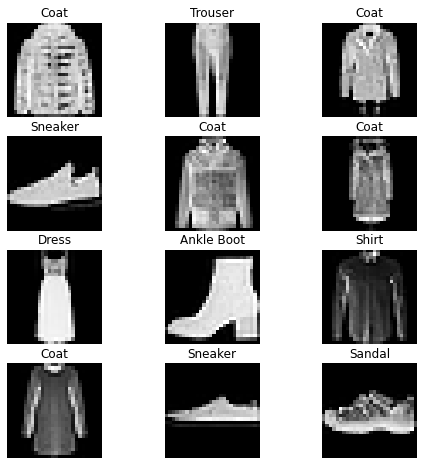

In [5]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 4

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_set), size=(1,)).item()
    img, label = train_set[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

Feature batch shape: torch.Size([45, 1, 28, 28])
Labels batch shape: torch.Size([45])


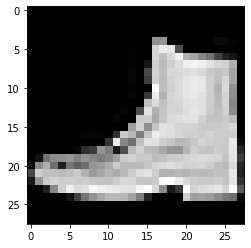

Label: 9


In [6]:
# Display image and label.
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Section 2: Neural Networks and PyTorch Design

Build PyTorch CNN - http://deeplizard.com/learn/video/k4jY9L8H89U  
CNN Layers - http://deeplizard.com/learn/video/IKOHHItzukk  
CNN Weights - http://deeplizard.com/learn/video/stWU37L91Yc  
Callable Neural Networks - http://deeplizard.com/learn/video/rcc86nXKwkw  
CNN Forward Method - http://deeplizard.com/learn/video/MasG7tZj-hw  

In [23]:
class Network_FashionMNIST(nn.Module):
    def __init__(self):
        super(Network_FashionMNIST, self).__init__()

        # TODO_A6: 
        # adapt the kernel sizes (Task 1)
        # adapt the number of channels (feautre maps) (Task 2)
        # I changed the kernel size to 6 and out channels to 3. 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=4, kernel_size=2)
        self.conv2 = nn.Conv2d(in_channels=4, out_channels=12, kernel_size=2)
 
        # TODO_A6:  
        # adapt the number of feautres (Task 3)
        # then changed the layer to 8-kernel size^2 * 12 to match matrix
        self.fc1 = nn.Linear(in_features=12 * 6 * 6, out_features=432)
        self.fc2 = nn.Linear(in_features=432, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # (1) input layer
        t = t       

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)        
        t = F.max_pool2d(t, kernel_size=2, stride=2)        
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)        
        t = F.max_pool2d(t, kernel_size=2, stride=2)        
        
        # (4) hidden linear layer        
        t = t.view(t.size(0), -1)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = torch.sigmoid(t)
        
        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)
        
        return t

    # this is a copy of forward used to print the size of the layers
    def print_forward(self, t):
        # (1) input layer
        t = t
        print("(1) input layer: ", t.size())
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)        
        print("(2) hidden conv layer: ", t.size())        
                
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        print("(2) max pool filter: ", t.size())
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        print("(3) hidden conv layer: ", t.size())        
        
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        print("(3) max pool filter: ", t.size())
        
        # (4) hidden linear layer
        t = t.view(t.size(0), -1)
        t = self.fc1(t)
        t = F.relu(t)
        print("(4) hidden linear layer: ", t.size())
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = torch.sigmoid(t)
        print("(5) hidden linear layer: ", t.size())
        
        # (6) output layer
        t = self.out(t)
        print("(6) output layer: ", t.size())
        #t = F.softmax(t, dim=1)
        
        return t

# Section 3: Training Neural Networks

In [20]:
# create instance of the network
network = Network_FashionMNIST()

# print network setup
print(network)

# run the print forward pass to see the sizes of layers
x = torch.randn(1, 1, 28, 28)
network.cpu().print_forward(x);

Network_FashionMNIST(
  (conv1): Conv2d(1, 4, kernel_size=(2, 2), stride=(1, 1))
  (conv2): Conv2d(4, 12, kernel_size=(2, 2), stride=(1, 1))
  (fc1): Linear(in_features=432, out_features=432, bias=True)
  (fc2): Linear(in_features=432, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)
(1) input layer:  torch.Size([1, 1, 28, 28])
(2) hidden conv layer:  torch.Size([1, 4, 27, 27])
(2) max pool filter:  torch.Size([1, 4, 13, 13])
(3) hidden conv layer:  torch.Size([1, 12, 12, 12])
(3) max pool filter:  torch.Size([1, 12, 6, 6])
(4) hidden linear layer:  torch.Size([1, 432])
(5) hidden linear layer:  torch.Size([1, 60])
(6) output layer:  torch.Size([1, 10])


In [21]:
# create optimizer, we use the SGD which we learned
optimizer = optim.SGD(network.parameters(), lr=learning_rate) # Optimizer

# creat a device, gpu if requested
device = torch.device("cuda:0" if use_gpu and torch.cuda.is_available() else "cpu")
# print("used device:", device)

# move the network to the device
network = network.to(device)

# array to store the progress
epoch_loss = []

In [22]:
# The training loop
for epoch in range(num_epochs):
    t = time.time()
    total_labels = 0  
    total_correct = 0    
    total_loss = 0        
    epoch_loss.append(0)

    for batch in train_loader:
        # get the samples images and their labels for the batk
        images, labels = batch

        # move to selected device (gpu or cpu)
        images = images.to(device)
        labels = labels.to(device)

        # class predictions
        preds = network(images)
        
        # cross-entropy loss
        loss = F.cross_entropy(preds, labels)
        
        # clear gradient
        optimizer.zero_grad()
        # backpropagation
        loss.backward()

        # one step of the optmizer (using the gradients from backpropagation)
        optimizer.step()
        
        # track loss and predicion accuracy
        epoch_loss[-1] += loss.item()
        total_loss += loss.item()
        total_correct += preds.argmax(dim=1).eq(labels).sum().item()
        total_labels += len(labels)

    print('Epoch [%d / %d] loss: %f, accuracy: %f, time: %3.3f' 
          % (epoch+1, num_epochs, total_loss, total_correct/total_labels, np.round_(time.time() - t, 3)))    

Epoch [1 / 5] loss: 2969.236570, accuracy: 0.212633, time: 7.214
Epoch [2 / 5] loss: 2576.000991, accuracy: 0.535367, time: 7.276
Epoch [3 / 5] loss: 2562.970048, accuracy: 0.541117, time: 8.129
Epoch [4 / 5] loss: 2557.495689, accuracy: 0.543483, time: 7.198
Epoch [5 / 5] loss: 2505.851539, accuracy: 0.588150, time: 7.200


Plot Training Curve
--------------------

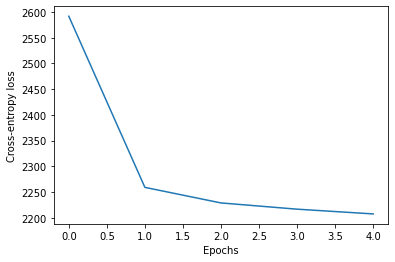

In [11]:
# plot the loss per epoch curve
fig = plt.figure()
plt.plot(epoch_loss)
plt.xlabel('Epochs')
plt.ylabel('Cross-entropy loss')
plt.show()

In [12]:
# Function to get all predictions at once
def get_all_preds(model, loader):
    all_preds = torch.tensor([]).to(device)
    for batch in loader:
        # get the samples images and their labels for the batk
        images, labels = batch

        # move to selected device (gpu or cpu)
        images = images.to(device)
        labels = labels.to(device)

        preds = model(images)
        all_preds = torch.cat((all_preds, preds), dim=0)
    return all_preds

In [13]:
# Analytics
prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)

# turn off gradient for forward evaluation
with torch.no_grad():
    train_preds = get_all_preds(network, prediction_loader)
    preds_correct = train_preds.argmax(dim=1).eq(train_set.targets.to(device)).sum().item()

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))

total correct: 48585
accuracy: 0.80975


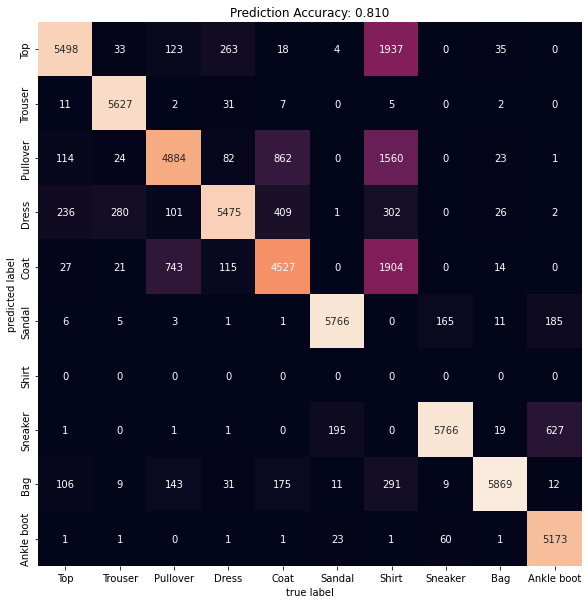

In [14]:
# move data to cpu for using scikit 
targets_cpu = train_set.targets.cpu()
preds_cpu = train_preds.cpu()

# compute the confusion matrix
cm = confusion_matrix(targets_cpu, preds_cpu.argmax(dim=1))
labels_names = ('Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')

# plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=labels_names, yticklabels=labels_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title("Prediction Accuracy: %1.3f" %accuracy_score(targets_cpu, preds_cpu.argmax(dim=1)));